In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium

from yellow import plots
import yellow.trajectories as traj
from yellow import trips as yt

In [3]:
trips = pd.read_csv('~/saida.csv')
cities = pd.read_csv('~/cities.csv')
stats = pd.read_csv('~/traj-stats.csv')
trips = trips.merge(cities[cities.city == 'São Paulo'], on='tripid') \
             .merge(stats[stats.num_takes >= 2], on='tripid')
print(len(trips), 'trips in São Paulo')

324232 trips in São Paulo


### Distribution of durations

In [4]:
(trips.total_duration/60).describe()

count    324232.000000
mean         14.689475
std         151.169286
min           0.000017
25%           1.092412
50%           6.398050
75%          13.942400
max       42621.611833
Name: total_duration, dtype: float64

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


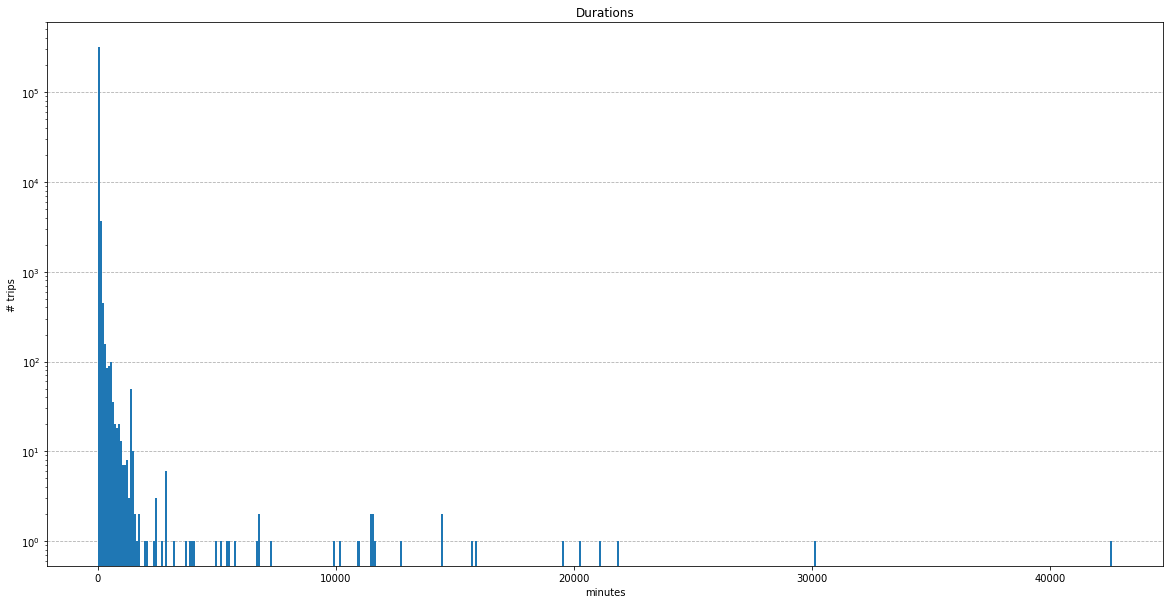

In [11]:
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(trips.total_duration/60, 'Durations', 'minutes')
plt.show()

### Low durations

In [9]:
low_durations = trips[trips.total_duration < 1*60]
print(len(low_durations), 'trips with less than 1 minute')

77306 trips with less than 1 minute


Where are they?

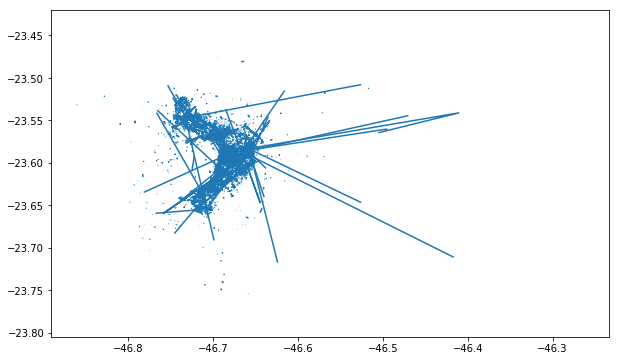

In [10]:
trajectories = traj.process_trajectories(low_durations)
fig, ax = plt.subplots(figsize=(10, 10))
trajectories.plot(ax=ax)
plt.show()

Wow! Some big distances for low-duration trips:

In [16]:
low_durations_big_distances = trips[(trips.total_duration < 1*60) & (trips.total_distance > 1*1000)]
print(len(low_durations_big_distances), 'trips with less than 1 minute and more than 1 km')

114 trips with less than 1 minute and more than 1 km


In [21]:
(low_durations_big_distances.total_distance/1000).describe()

count    114.000000
mean       4.568777
std        6.528210
min        1.007229
25%        1.247716
50%        1.746750
75%        4.430449
max       39.027711
Name: total_distance, dtype: float64

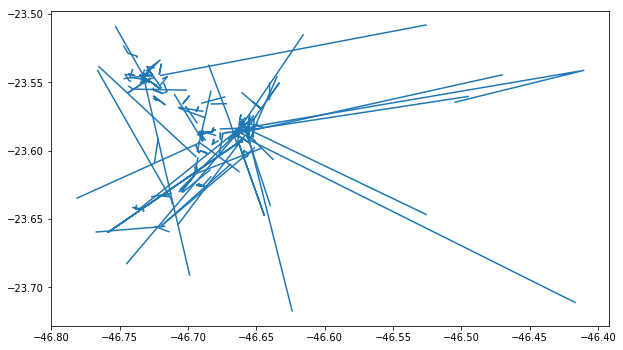

In [17]:
trajectories = traj.process_trajectories(low_durations_big_distances)
fig, ax = plt.subplots(figsize=(10, 10))
trajectories.plot(ax=ax)
plt.show()

When do they occur?

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


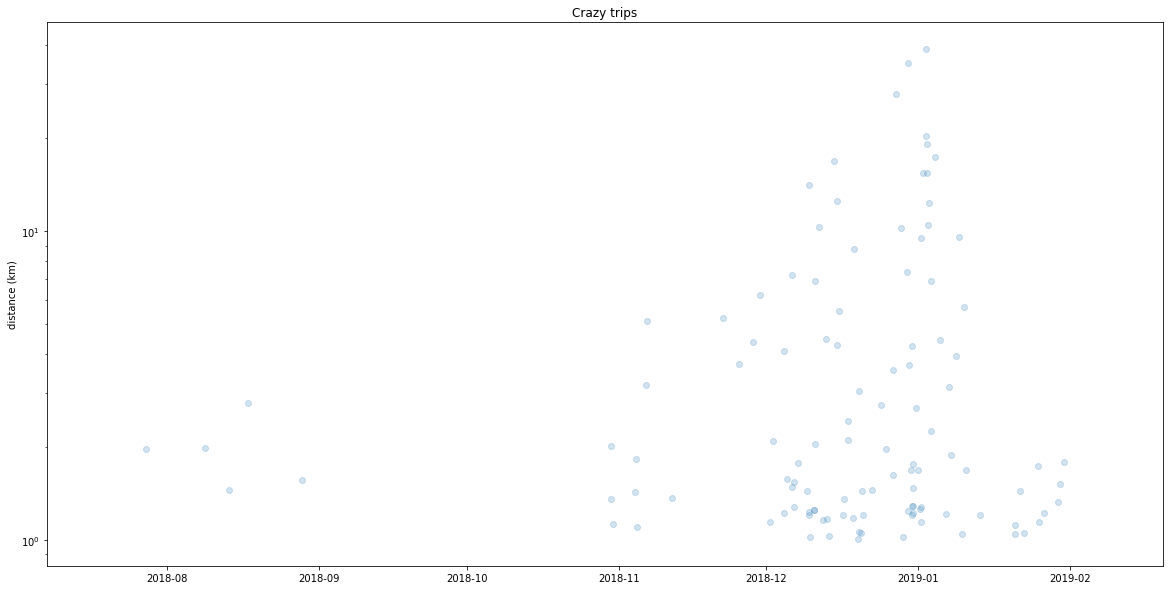

In [19]:
low_durations_big_distances['start_time'] = yt.extract_start_times(low_durations_big_distances)
plt.figure(figsize=(20, 10))
plt.yscale('log')
plots.time_scatter(low_durations_big_distances.total_distance/1000, 
                   'Crazy trips', 'distance (km)',
                   low_durations_big_distances.start_time)
plt.show()

### High durations

In [26]:
high_durations = trips[trips.total_duration > 3*60*60]
print(len(high_durations), 'trips with more than 3 hours')

1034 trips with more than 3 hours


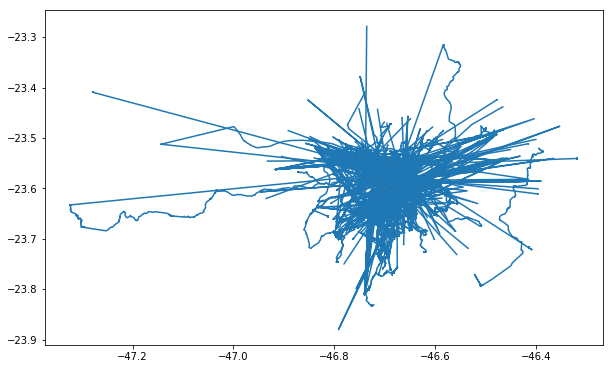

In [27]:
trajectories = traj.process_trajectories(high_durations)
fig, ax = plt.subplots(figsize=(10, 10))
trajectories.plot(ax=ax)
plt.show()

Long distances are the expected. But what about short?

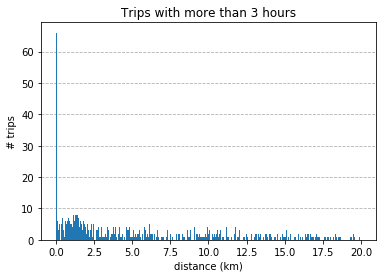

In [45]:
selected = high_durations[high_durations.total_distance < 20*1000]
plots.dist_chart(selected.total_distance/1000, 'Trips with more than 3 hours', 'distance (km)')

In [51]:
(high_durations.total_distance//10*10).value_counts().head(20)

0.0       50
20.0       7
690.0      5
10.0       5
1150.0     5
50.0       5
400.0      4
570.0      4
1400.0     4
1320.0     4
30.0       4
3350.0     4
1440.0     4
930.0      4
990.0      4
2890.0     3
2080.0     3
1590.0     3
2210.0     3
1330.0     3
Name: total_distance, dtype: int64

In [80]:
high_durations_short_distances = trips[(trips.total_duration > 3*60*60) & (trips.total_distance < 1)]
print(len(high_durations_short_distances), 'trips with more than 3 hours and less than 1m')

44 trips with more than 3 hours and less than 1m


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


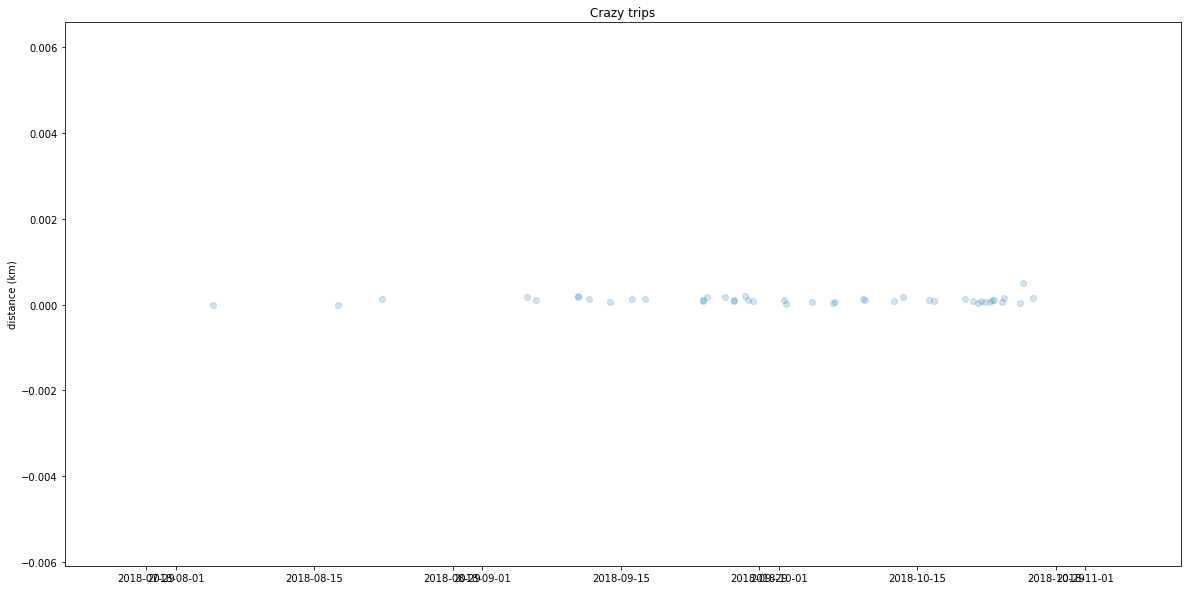

In [83]:
high_durations_short_distances['start_time'] = yt.extract_start_times(high_durations_short_distances)
plt.figure(figsize=(20, 10))
plots.time_scatter(high_durations_short_distances.total_distance/1000, 
                   'Crazy trips', 'distance (km)',
                   high_durations_short_distances.start_time)
plt.show()